1)

In [210]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [211]:
from tensorflow.keras.datasets import fashion_mnist

In [212]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [213]:
X_train_full.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [214]:
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [215]:
X_full=np.concatenate([X_train_full,X_test])
y_full=np.concatenate([y_train_full,y_test])

In [216]:
y_full

array([9, 0, 0, ..., 8, 1, 5], dtype=uint8)

In [217]:
X_full.shape

(70000, 28, 28)

In [218]:
keep=np.isin(y_full,[5, 7, 9])

In [219]:
X=X_full[keep]
y=y_full[keep]

In [220]:
X.shape

(21000, 28, 28)

In [221]:
train=int((5/7)*X.shape[0])
valid=int((1/7)*X.shape[0])
test=int((1/7)*X.shape[0])

In [222]:
train,valid,test

(15000, 3000, 3000)

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
X_train, X_save, y_train, y_save = train_test_split(X, y, test_size=2/7, stratify=y, random_state=42)#we use 5/7 for training X_save is 2/7

In [225]:
X_valid, X_test, y_valid, y_test = train_test_split(X_save, y_save, test_size=1/2, stratify=y_save, random_state=42)
#we use 1/2 from the remaining 2/7 from the last split for test set and valid set

In [226]:
X_train=X_train/255.0
X_test=X_test/255.0
X_valid=X_valid/255.0

In [227]:
unique, counts = np.unique(y, return_counts=True) #check the values of y

In [228]:
d1=dict(zip(unique, counts))

In [229]:
d1

{5: 7000, 7: 7000, 9: 7000}

In [230]:
names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

In [231]:
for k in d1.keys():
    print(f"{names[k]} has {d1[k]} values")

Sandal has 7000 values
Sneaker has 7000 values
Ankle boot has 7000 values


2)

In [232]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout,Reshape
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.regularizers import l1 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [233]:
stacked_encoder = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(50, activation='relu')  
])

In [234]:
stacked_decoder = Sequential([
    Dense(256, activation='relu', input_shape=(50,)),
    Dense(28*28, activation='sigmoid'),
    Reshape([28, 28])
])

In [235]:
stacked_ae =Sequential([stacked_encoder, stacked_decoder])

In [236]:
stacked_ae.compile(loss="binary_crossentropy", optimizer=Nadam(learning_rate=1e-4))

In [237]:
stacked_ae.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 50)                213810    
                                                                 
 sequential_15 (Sequential)  (None, 28, 28)            214544    
                                                                 
Total params: 428354 (1.63 MB)
Trainable params: 428354 (1.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


3)

In [238]:
stacked_encoder2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(50, activation='relu',activity_regularizer=l1(1e-6))  
])

In [239]:
stacked_decoder2 = Sequential([
    Dense(256, activation='relu', input_shape=(50,)),
    Dense(28*28, activation='sigmoid'),
    Reshape([28, 28])
])

In [240]:
stacked_ae2 =Sequential([stacked_encoder2, stacked_decoder2])

In [241]:
stacked_ae2.compile(loss="binary_crossentropy", optimizer=Nadam(learning_rate=1e-4))

In [242]:
stacked_ae2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_17 (Sequential)  (None, 50)                213810    
                                                                 
 sequential_18 (Sequential)  (None, 28, 28)            214544    
                                                                 
Total params: 428354 (1.63 MB)
Trainable params: 428354 (1.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


4)

In [243]:
from tensorflow.keras.callbacks import EarlyStopping

In [244]:
callback = EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-2)

In [245]:
def history(batch_size,ae):
    history_ae = ae.fit(X_train, X_train, epochs=50,batch_size=batch_size,callbacks=[callback],
                             validation_data=(X_valid, X_valid))
    return(history_ae)

In [246]:
history_ae_32=history(32,stacked_ae)

Epoch 1/50
469/469 [==============================] - 10s 15ms/step - loss: 0.3564 - val_loss: 0.2812
Epoch 2/50
469/469 [==============================] - 6s 13ms/step - loss: 0.2664 - val_loss: 0.2578
Epoch 3/50
469/469 [==============================] - 5s 11ms/step - loss: 0.2508 - val_loss: 0.2459
Epoch 4/50
469/469 [==============================] - 6s 13ms/step - loss: 0.2416 - val_loss: 0.2385
Epoch 5/50
469/469 [==============================] - 6s 12ms/step - loss: 0.2357 - val_loss: 0.2339
Epoch 6/50
469/469 [==============================] - 6s 12ms/step - loss: 0.2318 - val_loss: 0.2307
Epoch 7/50
469/469 [==============================] - 6s 12ms/step - loss: 0.2287 - val_loss: 0.2278
Epoch 8/50
469/469 [==============================] - 6s 13ms/step - loss: 0.2262 - val_loss: 0.2255
Epoch 9/50
469/469 [==============================] - 6s 12ms/step - loss: 0.2241 - val_loss: 0.2236
Epoch 10/50
469/469 [==============================] - 5s 11ms/step - loss: 0.2223 - val_l

In [247]:
history_ae_256=history(256,stacked_ae)

Epoch 1/50
59/59 [==============================] - 2s 32ms/step - loss: 0.2165 - val_loss: 0.2170
Epoch 2/50
59/59 [==============================] - 2s 32ms/step - loss: 0.2163 - val_loss: 0.2168
Epoch 3/50
59/59 [==============================] - 2s 27ms/step - loss: 0.2162 - val_loss: 0.2167
Epoch 4/50
59/59 [==============================] - 2s 27ms/step - loss: 0.2160 - val_loss: 0.2166
Epoch 5/50
59/59 [==============================] - 2s 30ms/step - loss: 0.2159 - val_loss: 0.2165
Epoch 6/50
59/59 [==============================] - 2s 30ms/step - loss: 0.2158 - val_loss: 0.2164


In [248]:
history_ae2_32=history(32,stacked_ae2)

Epoch 1/50
469/469 [==============================] - 10s 15ms/step - loss: 0.3538 - val_loss: 0.2802
Epoch 2/50
469/469 [==============================] - 5s 11ms/step - loss: 0.2659 - val_loss: 0.2575
Epoch 3/50
469/469 [==============================] - 5s 11ms/step - loss: 0.2511 - val_loss: 0.2467
Epoch 4/50
469/469 [==============================] - 5s 11ms/step - loss: 0.2421 - val_loss: 0.2391
Epoch 5/50
469/469 [==============================] - 6s 14ms/step - loss: 0.2358 - val_loss: 0.2339
Epoch 6/50
469/469 [==============================] - 6s 12ms/step - loss: 0.2316 - val_loss: 0.2304
Epoch 7/50
469/469 [==============================] - 6s 14ms/step - loss: 0.2285 - val_loss: 0.2277
Epoch 8/50
469/469 [==============================] - 6s 13ms/step - loss: 0.2260 - val_loss: 0.2255
Epoch 9/50
469/469 [==============================] - 6s 12ms/step - loss: 0.2239 - val_loss: 0.2235
Epoch 10/50
469/469 [==============================] - 7s 14ms/step - loss: 0.2222 - val_l

In [203]:
history_ae2_256=history(256,stacked_ae2)

Epoch 1/50
59/59 [==============================] - 1s 24ms/step - loss: 0.2159 - val_loss: 0.2164
Epoch 2/50
59/59 [==============================] - 2s 27ms/step - loss: 0.2157 - val_loss: 0.2163
Epoch 3/50
59/59 [==============================] - 1s 22ms/step - loss: 0.2156 - val_loss: 0.2161
Epoch 4/50
59/59 [==============================] - 1s 23ms/step - loss: 0.2155 - val_loss: 0.2160
Epoch 5/50
59/59 [==============================] - 1s 24ms/step - loss: 0.2153 - val_loss: 0.2159
Epoch 6/50
59/59 [==============================] - 1s 25ms/step - loss: 0.2152 - val_loss: 0.2158


In [256]:
def history_plot(history,epoch,title):
    pd.DataFrame(history.history).plot(
        figsize=(8, 5), xlim=[0,epoch-2], grid=True, xlabel="Epoch",
        style=["r--", "r--."],linewidth=1)
    plt.legend(loc="upper right")
    plt.title(f"{title}")
    plt.show()

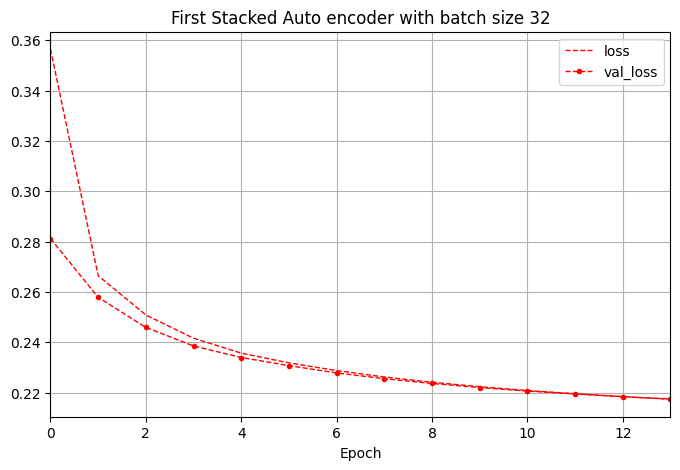

In [257]:
history_plot(history_ae_32,15,"First Stacked Auto encoder with batch size 32")

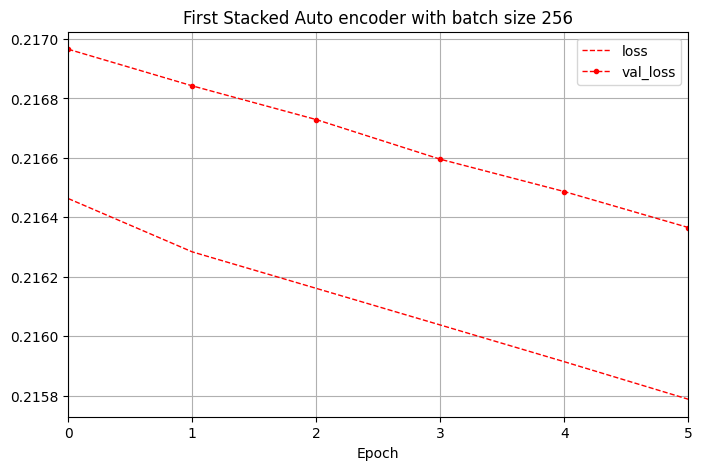

In [258]:
history_plot(history_ae_256,7,"First Stacked Auto encoder with batch size 256")

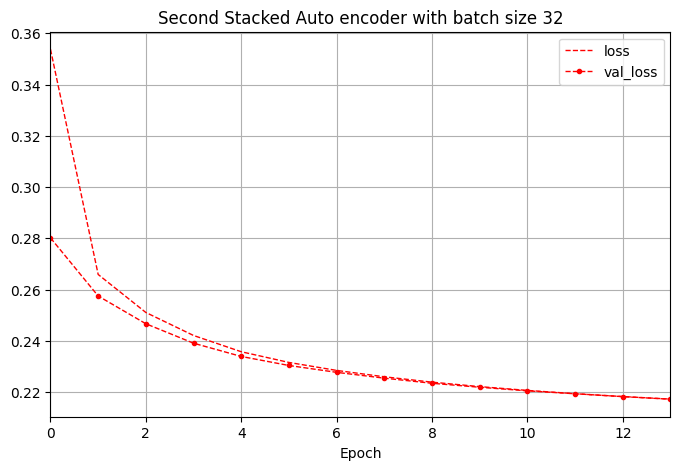

In [259]:
history_plot(history_ae2_32,15,"Second Stacked Auto encoder with batch size 32")

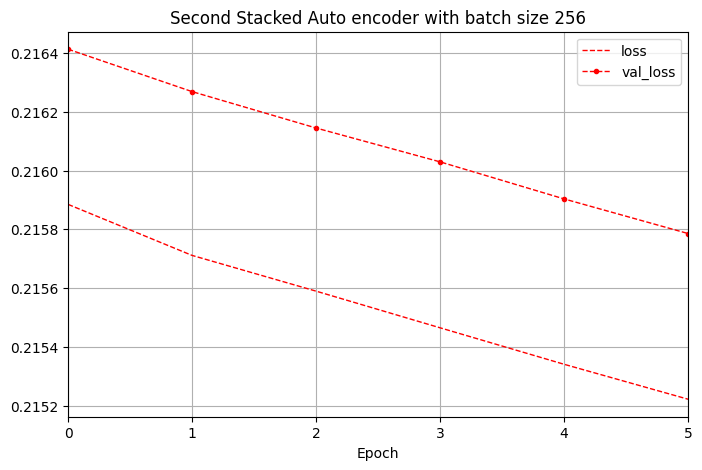

In [260]:
history_plot(history_ae2_256,7,"Second Stacked Auto encoder with batch size 256")

As we can both auto encoders with batch size 32 and 256 perform around the same after 15 and 7 epochs respectively. However the one with 256 batch size achieves faster better results.

5)

In [261]:
def plot_reconstructions(model, images=X_valid, n_images=15):
    reconstructions = np.clip(model.predict(images[:n_images]), 0, 1)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")
        plt.axis("off")

1/1 [==============================] - 0s 157ms/step


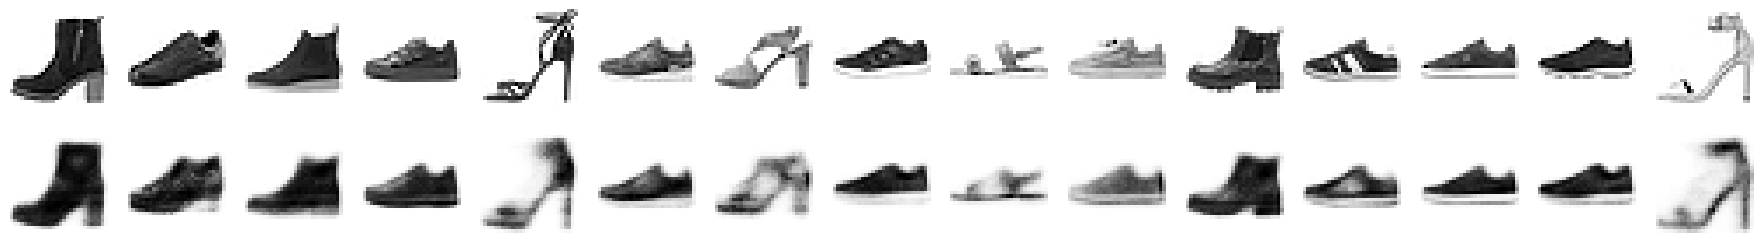

In [262]:
plot_reconstructions(stacked_ae) 
plt.show()

1/1 [==============================] - 0s 186ms/step


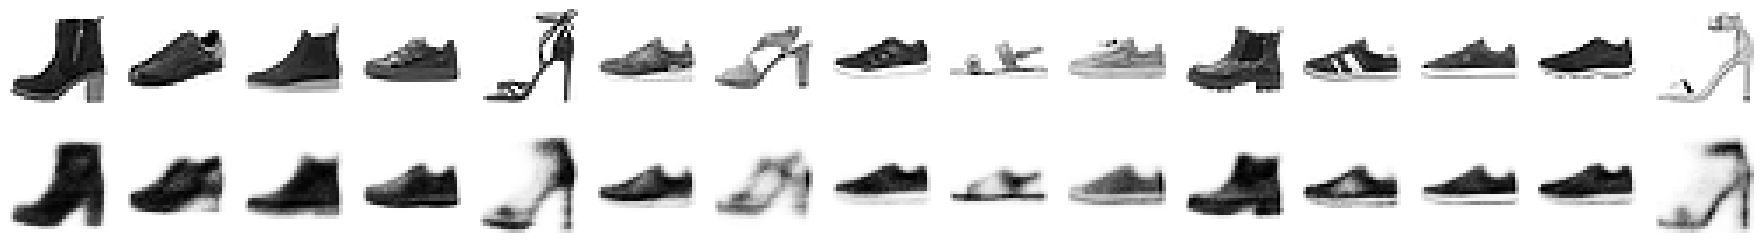

In [263]:
plot_reconstructions(stacked_ae2)  
plt.show()